## Exploratory Data Analysis of the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df_school = pd.read_csv('../dataset/dataset.csv')

In [52]:
df_school.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [53]:
df_school.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [54]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

### Count of Target

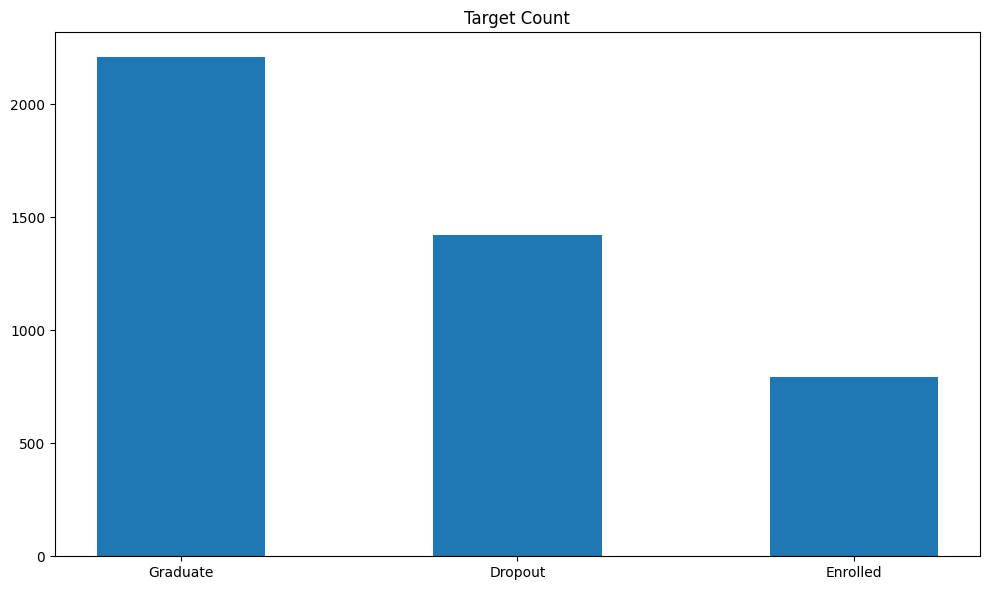

In [55]:

plt.figure(figsize=(10, 6))
class_counts = pd.DataFrame(df_school['Target'].value_counts())
class_counts.reset_index(inplace=True)
class_counts
plt.bar(class_counts['index'], class_counts['Target'], width = 0.50)
plt.title("Target Count")
plt.tight_layout()
plt.show()

### Unemployment Rate and Target, Gender

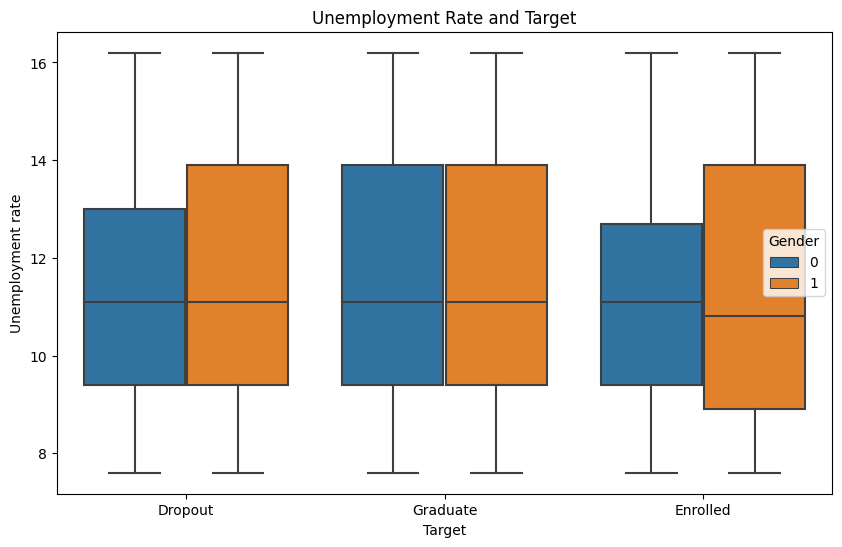

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Unemployment rate',hue='Gender', data=df_school)
plt.title('Unemployment Rate and Target')
plt.show()

Answering Questions 

- Distribution of students by gender, nationality, and age. 

In [58]:
# Function to add statistical annotations
def annotate_stats(ax, data, ypos=0.7):
    skewness = data.skew()
    kurtosis = data.kurt()
    mean = data.mean()
    median = data.median()
    std = data.std()
    var = data.var()
    
    stats_str = (
        f'Mean: {mean:.2f}\n'
        f'Median: {median:.2f}\n'
        f'Std. Dev.: {std:.2f}\n'
        f'Variance: {var:.2f}\n'
        f'Skewness: {skewness:.2f}\n'
        f'Kurtosis: {kurtosis:.2f}'
    )
    
    ax.text(0.75, ypos, stats_str, transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='aliceblue'))


In [68]:
# Function to annotate the bars with counts
def annotate_counts(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                '{:.0f}'.format(height),
                ha='center', va='bottom')



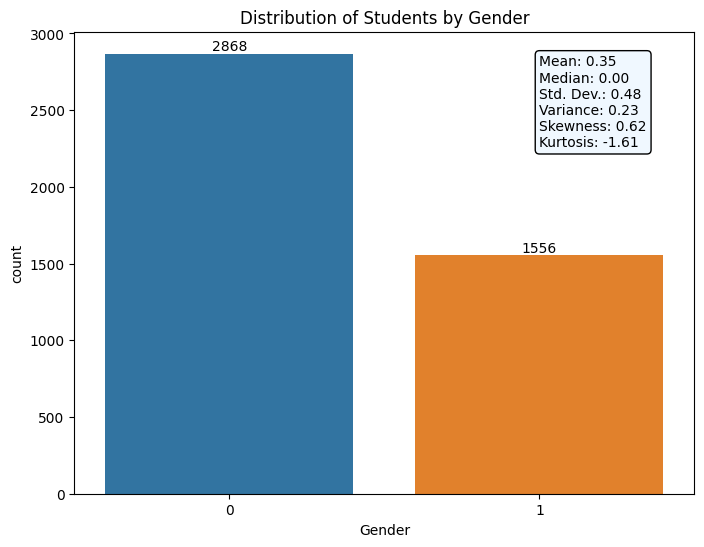

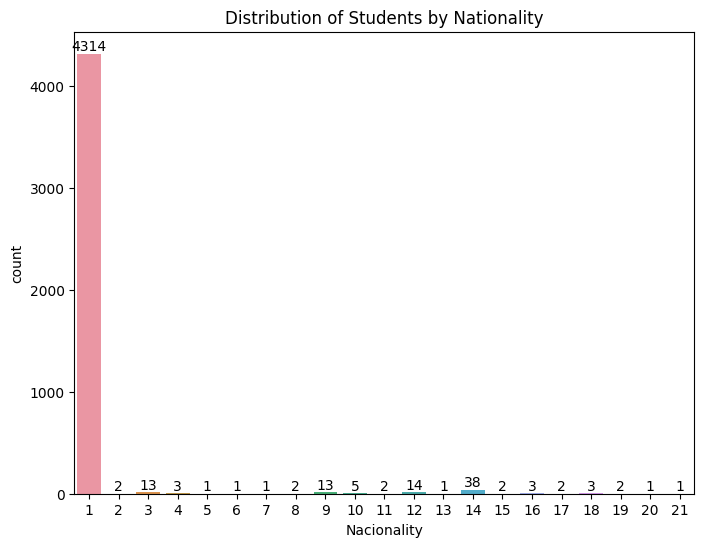

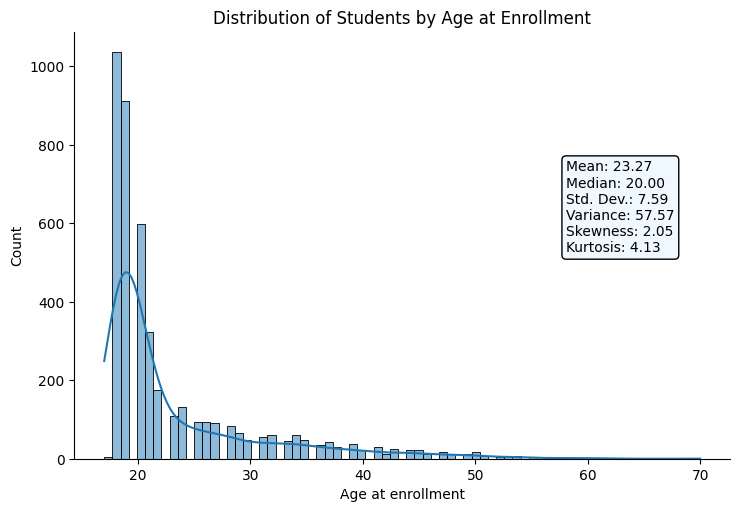

In [60]:
# Gender Distribution
plt.figure(figsize=(8, 6))
ax1 = sns.countplot(x='Gender', data=df_school)
annotate_counts(ax1)
annotate_stats(ax1, df_school['Gender'], ypos=0.95)
plt.title('Distribution of Students by Gender')
plt.show()

# Nationality Distribution
plt.figure(figsize=(8, 6))
ax2 = sns.countplot(x='Nacionality', data=df_school)
annotate_counts(ax2)
plt.title('Distribution of Students by Nationality')
plt.show()

# Age at Enrollment Distribution
g = sns.displot(df_school['Age at enrollment'], kde=True, aspect=1.5)
g.ax.set_title('Distribution of Students by Age at Enrollment')
annotate_stats(g.ax, df_school['Age at enrollment'])
plt.show()

- Differences between dropouts and graduates.

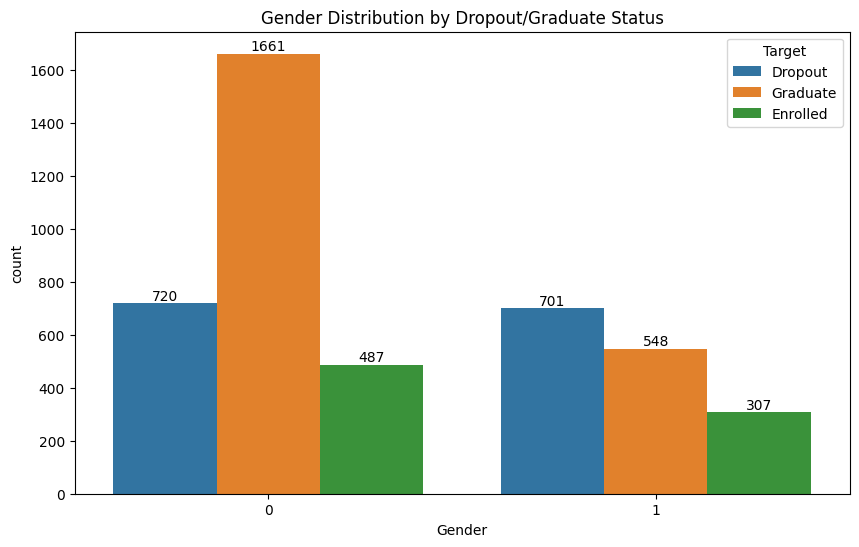

In [61]:
# Gender vs Target (Dropout/Graduate)
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(x='Gender', hue='Target', data=df_school)
annotate_counts(ax1)
plt.title('Gender Distribution by Dropout/Graduate Status')
plt.show()



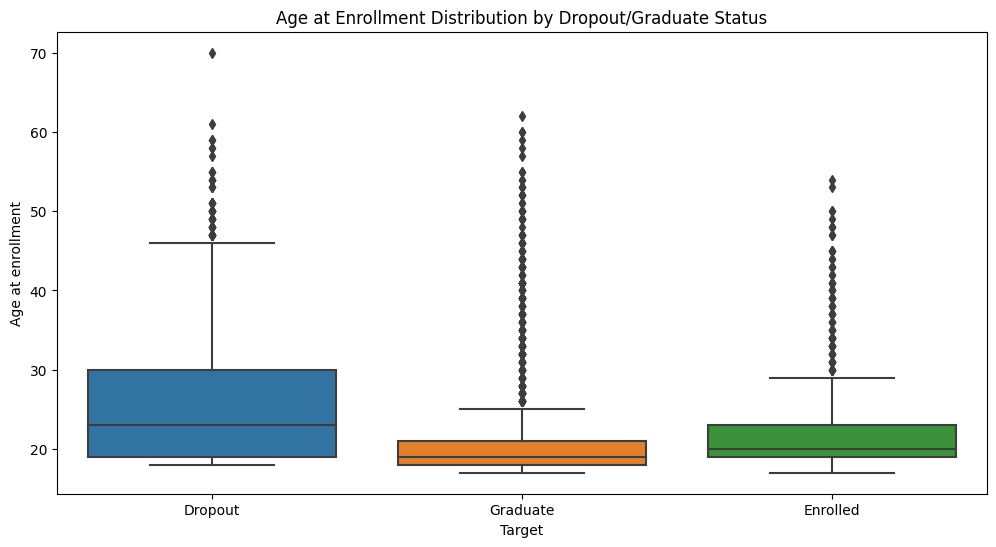

Statistics for Dropouts:
Median: 23.00
Q1 (25th percentile): 19.00
Q3 (75th percentile): 30.00
IQR (Interquartile Range): 11.00
Whisker Top: 46.50
Whisker Bottom: 18.00
-----------------------------
Statistics for Graduates:
Median: 19.00
Q1 (25th percentile): 18.00
Q3 (75th percentile): 21.00
IQR (Interquartile Range): 3.00
Whisker Top: 25.50
Whisker Bottom: 17.00
-----------------------------


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is loaded into a DataFrame named 'df_school'

# Define a function to print the relevant statistics
def print_statistics(data):
    Q1 = data.quantile(0.25)
    median = data.median()
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    whisker_top = min(data.max(), Q3 + 1.5 * IQR)
    whisker_bottom = max(data.min(), Q1 - 1.5 * IQR)

    print(f"Median: {median:.2f}")
    print(f"Q1 (25th percentile): {Q1:.2f}")
    print(f"Q3 (75th percentile): {Q3:.2f}")
    print(f"IQR (Interquartile Range): {IQR:.2f}")
    print(f"Whisker Top: {whisker_top:.2f}")
    print(f"Whisker Bottom: {whisker_bottom:.2f}")
    print("-----------------------------")

# Plotting the boxplot
plt.figure(figsize=(12, 6))
ax3 = sns.boxplot(x='Target', y='Age at enrollment', data=df_school)
plt.title('Age at Enrollment Distribution by Dropout/Graduate Status')
plt.show()

# Calculating and printing statistics for each group
print("Statistics for Dropouts:")
print_statistics(df_school[df_school['Target'] == 'Dropout']['Age at enrollment'])
print("Statistics for Graduates:")
print_statistics(df_school[df_school['Target'] == 'Graduate']['Age at enrollment'])


Relationship between marital status and likelihood to drop out.

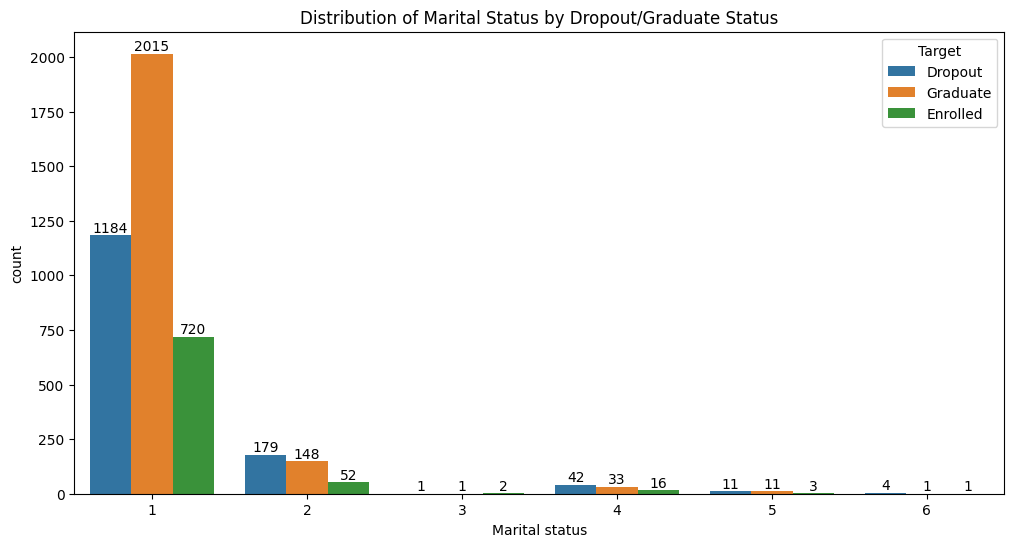

In [70]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Marital status', hue='Target', data=df_school)
plt.title('Distribution of Marital Status by Dropout/Graduate Status')
annotate_counts(ax)
plt.show()

In [71]:
# Group by 'Marital status' and 'Target'
grouped = df_school.groupby(['Marital status', 'Target']).size().unstack()

# Calculate dropout rate
grouped['Total'] = grouped['Dropout'] + grouped['Graduate'] + grouped['Enrolled']
grouped['Dropout Rate (%)'] = (grouped['Dropout'] / grouped['Total']) * 100

# Display the resulting DataFrame with the correct dropout rate
print(grouped[['Dropout Rate (%)']])


Target          Dropout Rate (%)
Marital status                  
1                      30.211789
2                      47.229551
3                      25.000000
4                      46.153846
5                      44.000000
6                      66.666667


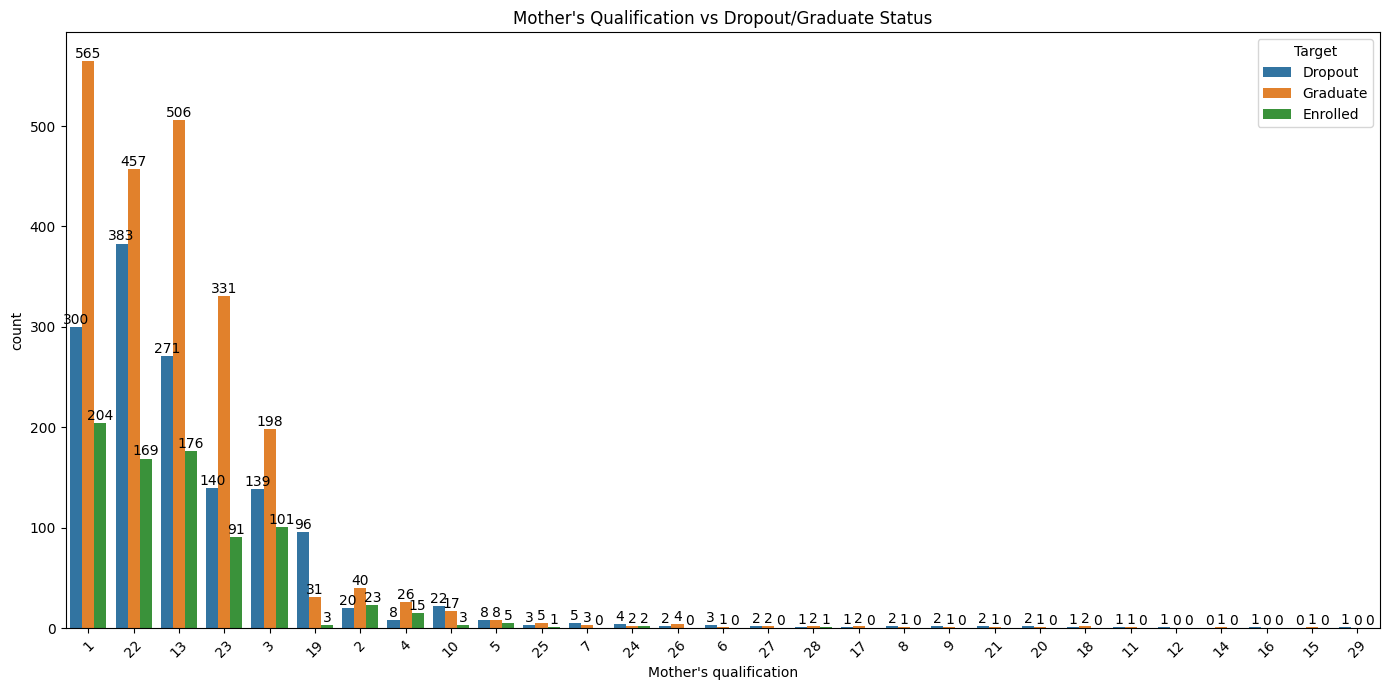

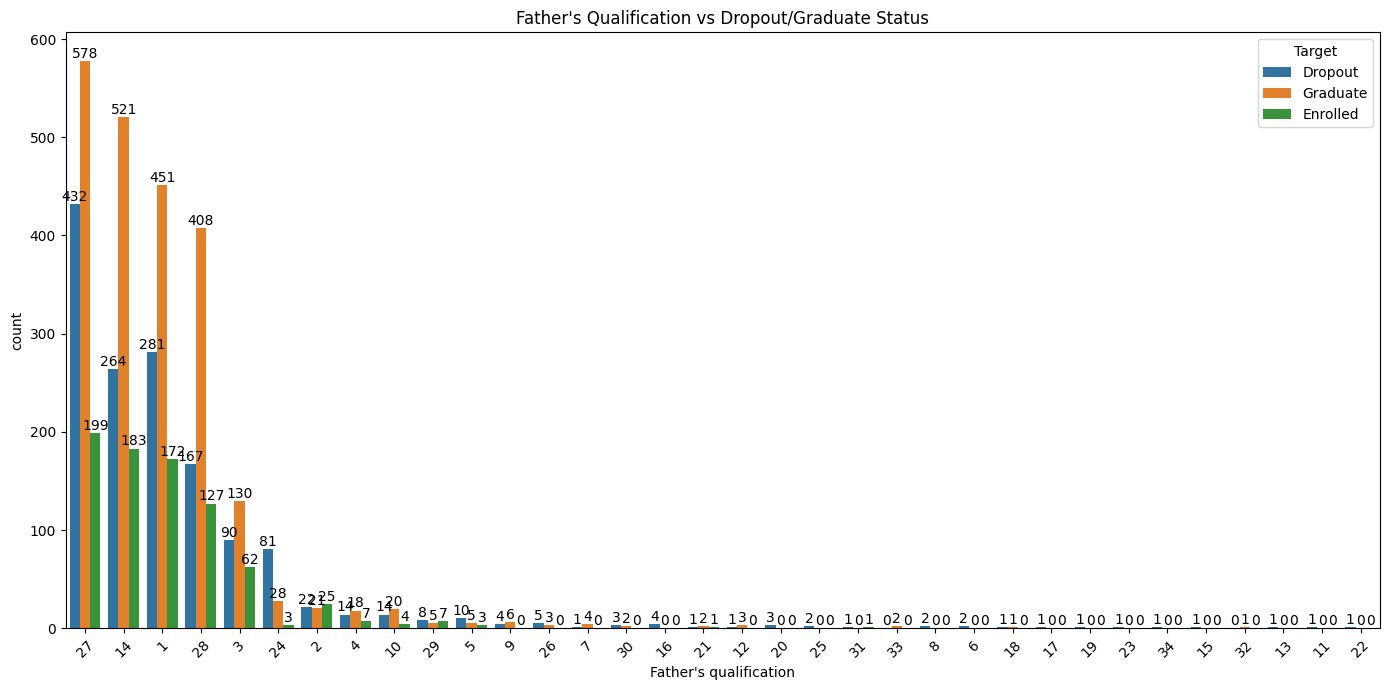

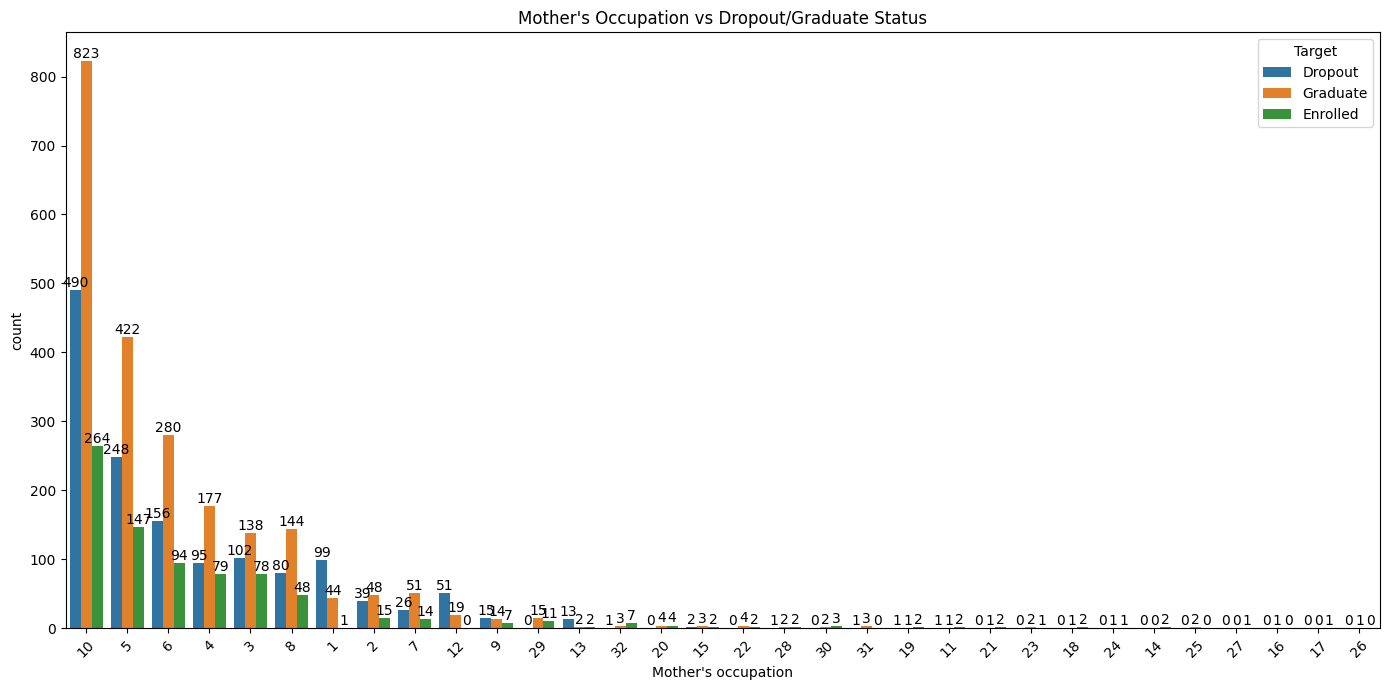

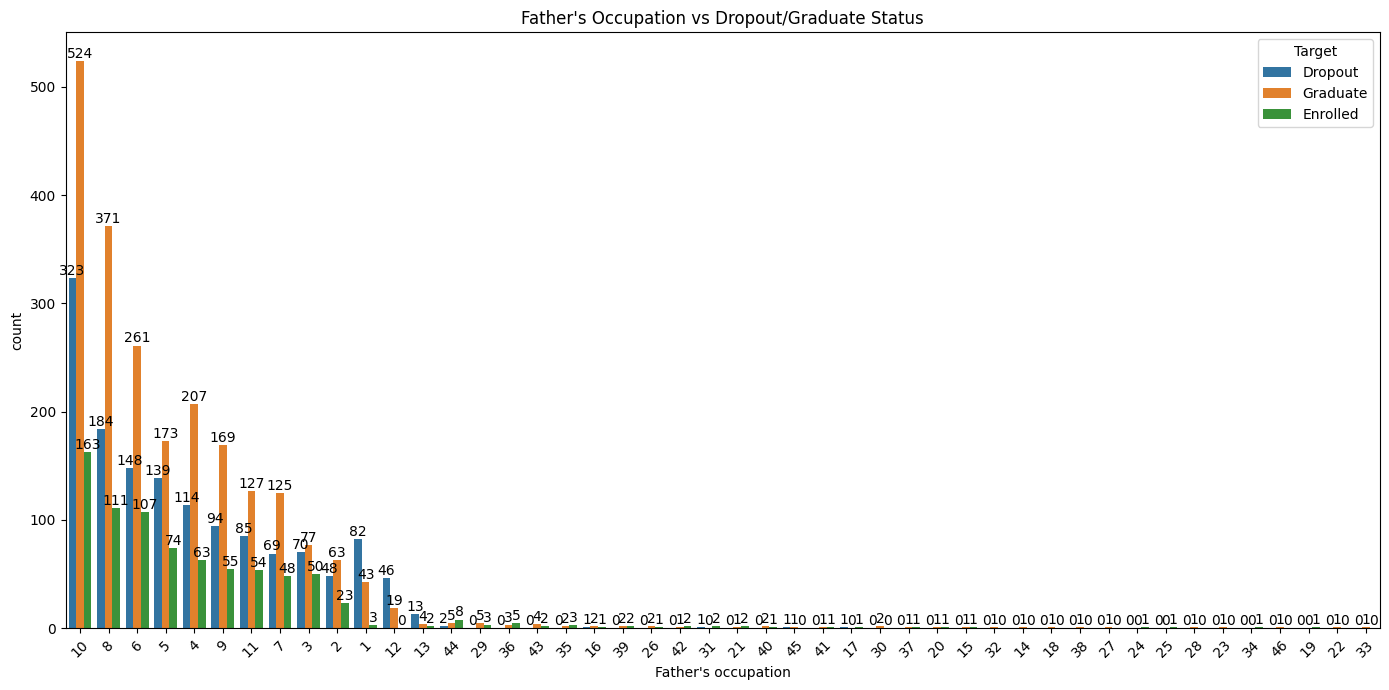

In [72]:
# Plot for Mother's qualification vs Target
plt.figure(figsize=(14, 7))
ax1 = sns.countplot(x='Mother\'s qualification', hue='Target', data=df_school, order=df_school['Mother\'s qualification'].value_counts().index)
annotate_counts(ax1)
plt.title("Mother's Qualification vs Dropout/Graduate Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Father's qualification vs Target
plt.figure(figsize=(14, 7))
ax2 = sns.countplot(x='Father\'s qualification', hue='Target', data=df_school, order=df_school['Father\'s qualification'].value_counts().index)
annotate_counts(ax2)
plt.title("Father's Qualification vs Dropout/Graduate Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Mother's occupation vs Target
plt.figure(figsize=(14, 7))
ax3 = sns.countplot(x='Mother\'s occupation', hue='Target', data=df_school, order=df_school['Mother\'s occupation'].value_counts().index)
annotate_counts(ax3)
plt.title("Mother's Occupation vs Dropout/Graduate Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Father's occupation vs Target
plt.figure(figsize=(14, 7))
ax4 = sns.countplot(x='Father\'s occupation', hue='Target', data=df_school, order=df_school['Father\'s occupation'].value_counts().index)
annotate_counts(ax4)
plt.title("Father's Occupation vs Dropout/Graduate Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
qualification_mapping = {
    1: 'Secondary Education',
    2: 'Higher Education - Undergraduate',
    3: 'Higher Education - Undergraduate',
    4: 'Higher Education - Graduate',
    5: 'Higher Education - Graduate',
    6: 'Higher Education - Undergraduate',
    7: 'Primary Education',
    8: 'Primary Education',
    9: 'Primary Education',
    10: 'Secondary Education',
    11: 'Secondary Education',
    12: 'Secondary Education',
    13: 'Secondary Education',
    14: 'Secondary Education',
    15: 'Secondary Education',
    16: 'Vocational/Technical',
    17: 'Secondary Education',
    18: 'Primary Education',
    19: 'Secondary Education',
    20: 'Primary Education',
    21: 'Primary Education',
    22: 'Secondary Education',
    23: 'Secondary Education',
    24: 'Unknown',
    25: 'Primary Education',
    26: 'Primary Education',
    27: 'Primary Education',
    28: 'Primary Education',
    29: 'Vocational/Technical',
    30: 'Higher Education - Undergraduate',
    31: 'Higher Education - Undergraduate',
    32: 'Higher Education - Undergraduate',
    33: 'Higher Education - Graduate',
    34: 'Higher Education - Graduate'
}

# Create 'Mother's Qualification Category' column by mapping the 'Mother's qualification' column
df_school["Mother's Qualification Category"] = df_school["Mother's qualification"].map(qualification_mapping)

# Similarly, create 'Father's Qualification Category' column by mapping the 'Father's qualification' column
df_school["Father's Qualification Category"] = df_school["Father's qualification"].map(qualification_mapping)

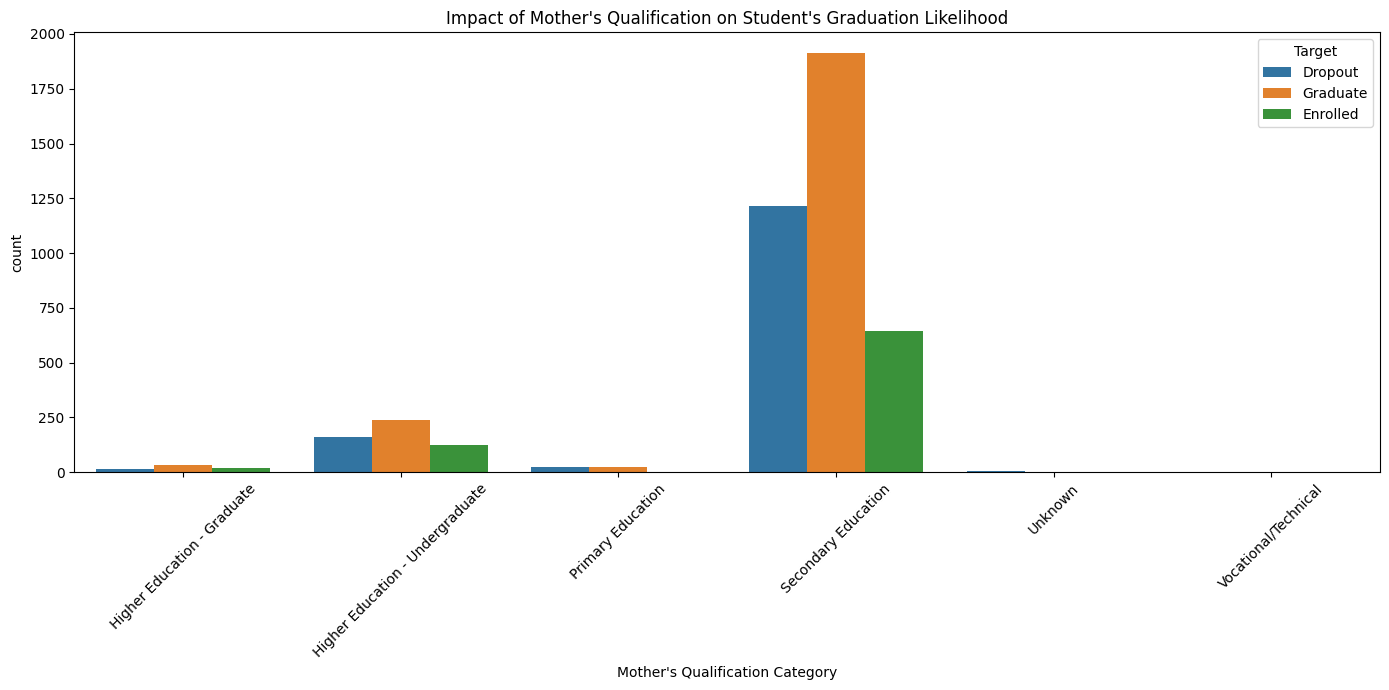

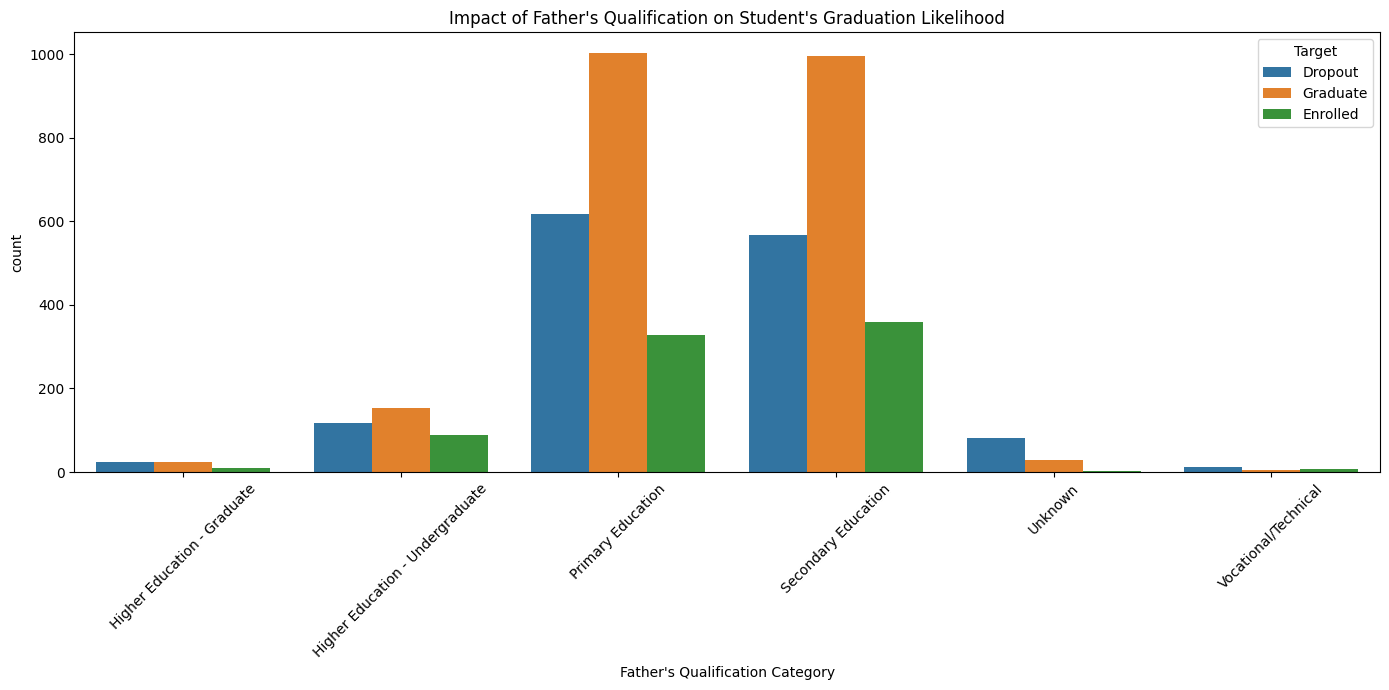

In [79]:
# Plot for Mother's Qualification
plt.figure(figsize=(14, 7))
sns.countplot(data=df_school, x="Mother's Qualification Category", hue='Target',
              order=sorted(df_school["Mother's Qualification Category"].unique()))
plt.title("Impact of Mother's Qualification on Student's Graduation Likelihood")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Father's Qualification
plt.figure(figsize=(14, 7))
sns.countplot(data=df_school, x="Father's Qualification Category", hue='Target',
              order=sorted(df_school["Father's Qualification Category"].unique()))
plt.title("Impact of Father's Qualification on Student's Graduation Likelihood")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


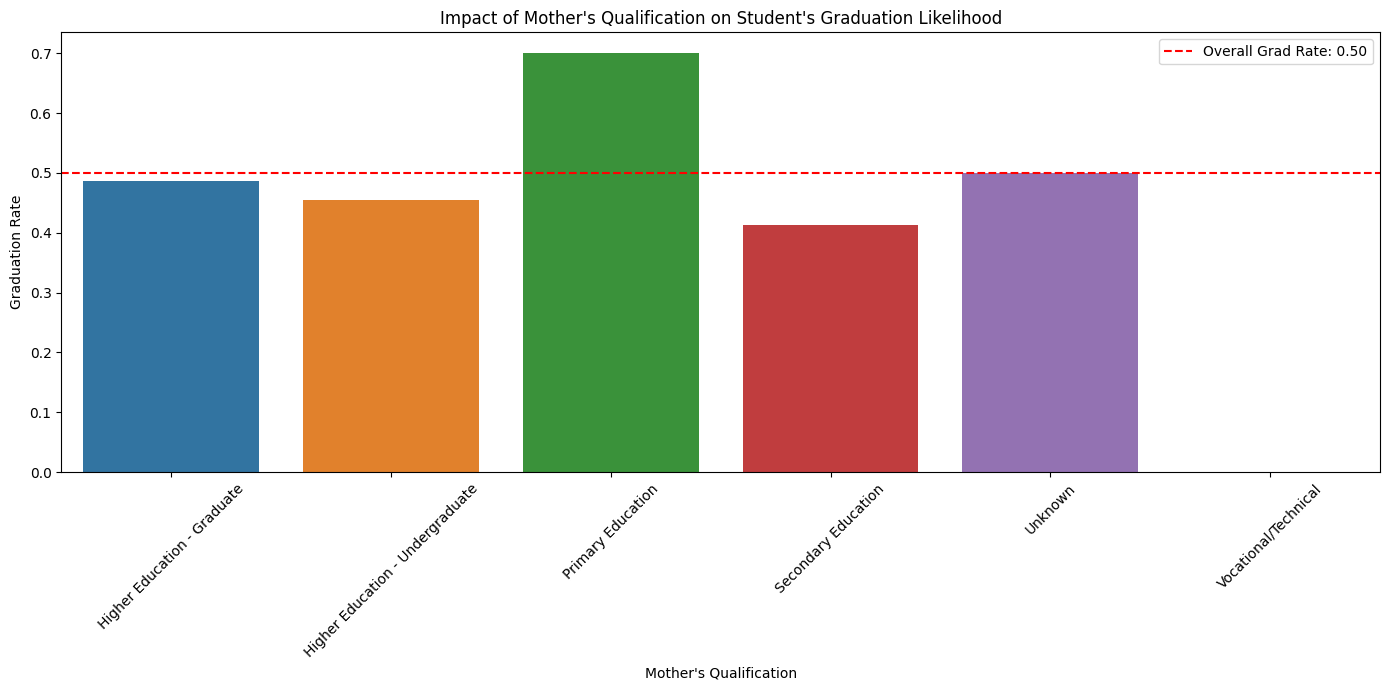

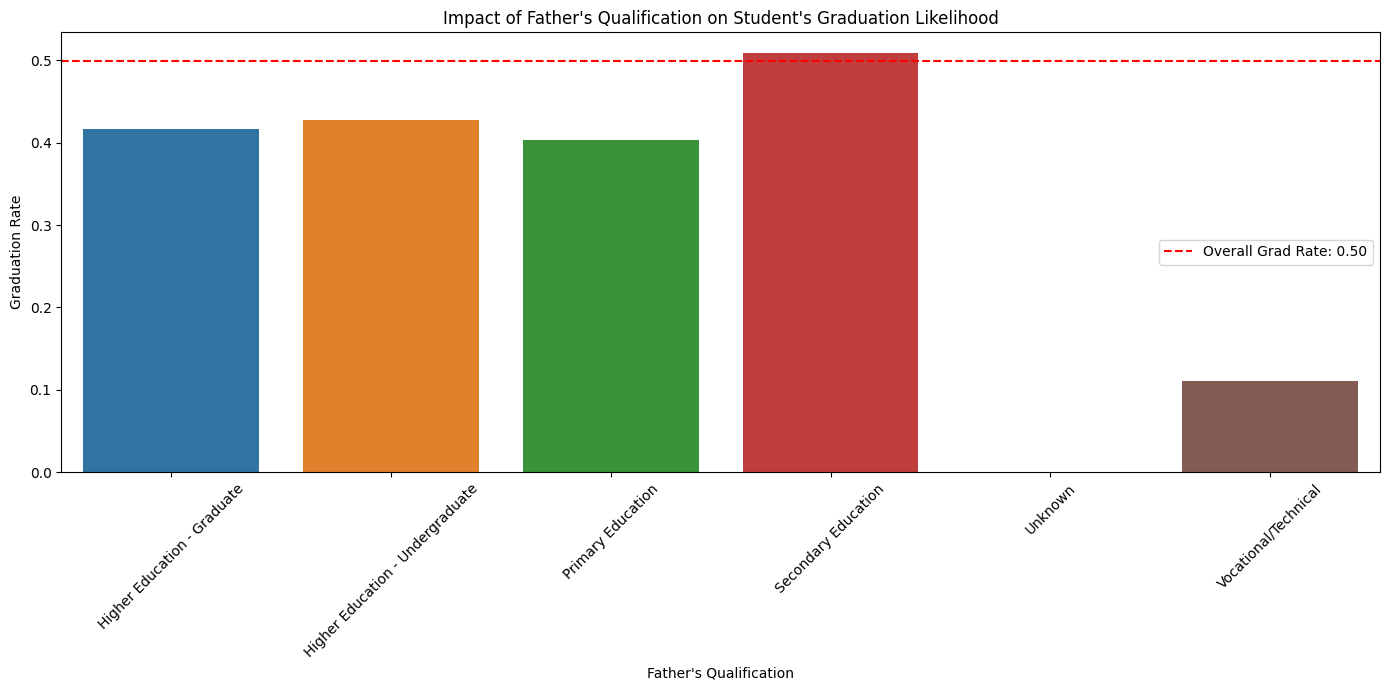

Chi-squared Test Result for Mother's Qualification: Statistic = 34.43, P-value = 0.0002
Chi-squared Test Result for Father's Qualification: Statistic = 116.19, P-value = 0.0000


In [85]:
from scipy.stats import chi2_contingency

# Overall graduation rate
overall_grad_rate = (df_school['Target'] == 'Graduate').mean()

# Create contingency tables for Chi-squared test
contingency_mother = pd.crosstab(df_school["Mother's Qualification Category"], df_school['Target'])
contingency_father = pd.crosstab(df_school["Father's Qualification Category"], df_school['Target'])

# Performing the Chi-squared test
chi2_stat_mother, p_val_mother, _, _ = chi2_contingency(contingency_mother)
chi2_stat_father, p_val_father, _, _ = chi2_contingency(contingency_father)

# Visualization
plt.figure(figsize=(14, 7))
sns.barplot(data=mothers_higher_edu_graduation_rate, x="Mother's Qualification", y='Graduation Rate')
plt.axhline(overall_grad_rate, color='red', linestyle='--', label=f"Overall Grad Rate: {overall_grad_rate:.2f}")
plt.title("Impact of Mother's Qualification on Student's Graduation Likelihood")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=fathers_higher_edu_graduation_rate, x="Father's Qualification", y='Graduation Rate')
plt.axhline(overall_grad_rate, color='red', linestyle='--', label=f"Overall Grad Rate: {overall_grad_rate:.2f}")
plt.title("Impact of Father's Qualification on Student's Graduation Likelihood")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the Chi-squared test results
print(f"Chi-squared Test Result for Mother's Qualification: Statistic = {chi2_stat_mother:.2f}, P-value = {p_val_mother:.4f}")
print(f"Chi-squared Test Result for Father's Qualification: Statistic = {chi2_stat_father:.2f}, P-value = {p_val_father:.4f}")
